## More Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.keras.backend.set_floatx('float64') # For preventing cast warning due to new TF behavior

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
plt.style.use('ggplot')

In [6]:
#plt.style.available

_Create a validation set_

In [7]:
validation_size = 0.1

In [8]:
ix = np.arange(X_train_full.shape[0])
np.random.shuffle(ix)
validation_end = int(validation_size * X_train_full.shape[0])
validation_ix = ix[:validation_end]
train_ix = ix[validation_end:]

In [9]:
X_valid, y_valid = (X_train_full[validation_ix], 
                    y_train_full[validation_ix])

In [10]:
X_train, y_train = (X_train_full[train_ix],
                    y_train_full[train_ix])

In [11]:
X_valid.shape, y_valid.shape

((6000, 28, 28), (6000,))

In [12]:
X_train.shape, y_train.shape

((54000, 28, 28), (54000,))

In [13]:
X_train[0].max(), X_train[0].min()

(255, 0)

**Classnames**

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shift', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
y_train[0]

1

In [16]:
class_names[y_train[0]]

'Trouser'

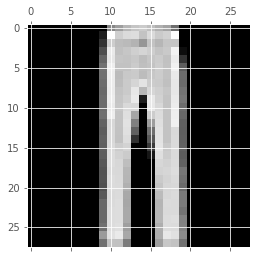

In [17]:
plt.matshow(X_train[0], cmap='gray')
None

In [18]:
def show_image(ix, data, labels):
    """
    Show the image at the give index 
    (Assume `ix` is less than maximum size of the data)
    
    Args:
        ix (int): data index to show
        data (pd.Dataframe): data source
        labels (pd.Series): labels for the data source
    """
    global class_names
    title = class_names[labels[ix]]
    image_data = data[ix]
    plt.matshow(image_data, cmap='gray')
    plt.axis('off')
    plt.title(title)

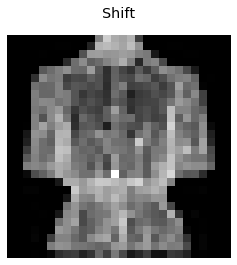

In [19]:
show_image(1, X_train, y_train)

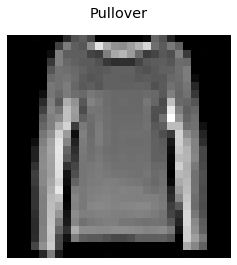

In [20]:
show_image(2, X_train, y_train)

## Creating a Perceptron... Again

In [21]:
X_train.shape

(54000, 28, 28)

In [22]:
n, m = X_train.shape[1:]
n, m

(28, 28)

In [23]:
fashion_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(n, m)), # This is new
    # From the book
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    # Additional layers
    tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [24]:
fashion_perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
__________________________________________________

In [25]:
# help(tf.keras.layers.Flatten)

In [26]:
len(fashion_perceptron.get_weights())

8

---

In [27]:
temp_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(n, m)), # This is new
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [28]:
w = temp_perceptron.get_weights()

In [29]:
for w in temp_perceptron.get_weights():
    print(len(w))
    

784
32
32
10


In [30]:
temp_perceptron.layers[0]

In [31]:
temp_perceptron.layers[0].get_weights()

[]

In [32]:
temp_perceptron.layers[1]

In [33]:
layer1_weights = temp_perceptron.layers[1].get_weights()

In [34]:
len(layer1_weights)

2

In [35]:
layer1_weights[0].shape # parameter weights

(784, 32)

In [36]:
layer1_weights[1].shape # biases

(32,)

---

In [37]:
fashion_perceptron.compile(loss="sparse_categorical_crossentropy",
                           optimizer="sgd",
                           metrics=["accuracy"])

Excerpt from the book:
>_First, we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead._

---

Using Gradient Descent? Scale the image data.

In [38]:
mx = X_train.max()
mx

255

In [39]:
X_train_scaled = X_train/mx

In [40]:
X_valid_scaled = X_valid/mx

In [41]:
X_test_scaled = X_test/mx

---

In [42]:
history = fashion_perceptron.fit(X_train_scaled, y_train,
#                                  epochs=30,
                                 epochs=45,
                                 shuffle=True,
                                 validation_data=(X_valid_scaled, 
                                                  y_valid),
                                 verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/45
54000/54000 - 6s - loss: 0.8527 - accuracy: 0.7067 - val_loss: 0.5923 - val_accuracy: 0.7888
Epoch 2/45
54000/54000 - 6s - loss: 0.5311 - accuracy: 0.8156 - val_loss: 0.5165 - val_accuracy: 0.8135
Epoch 3/45
54000/54000 - 6s - loss: 0.4711 - accuracy: 0.8344 - val_loss: 0.4397 - val_accuracy: 0.8413
Epoch 4/45
54000/54000 - 5s - loss: 0.4370 - accuracy: 0.8468 - val_loss: 0.4325 - val_accuracy: 0.8423
Epoch 5/45
54000/54000 - 6s - loss: 0.4118 - accuracy: 0.8540 - val_loss: 0.3974 - val_accuracy: 0.8572
Epoch 6/45
54000/54000 - 7s - loss: 0.3951 - accuracy: 0.8599 - val_loss: 0.3914 - val_accuracy: 0.8603
Epoch 7/45
54000/54000 - 7s - loss: 0.3813 - accuracy: 0.8646 - val_loss: 0.3809 - val_accuracy: 0.8593
Epoch 8/45
54000/54000 - 6s - loss: 0.3665 - accuracy: 0.8708 - val_loss: 0.3669 - val_accuracy: 0.8690
Epoch 9/45
54000/54000 - 6s - loss: 0.3579 - accuracy: 0.8721 - val_loss: 0.4645 - val_accuracy: 0.8198
Epoch 10/45
540

---

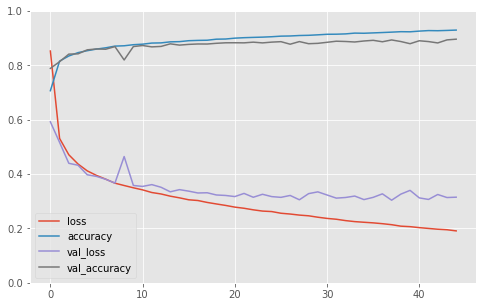

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [44]:
loss, acc = fashion_perceptron.evaluate(X_test_scaled, y_test)
f"Loss: {loss:.3f}, Accuracy: {acc:.2%}"

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3350 - accuracy: 0.8910


'Loss: 0.335, Accuracy: 89.10%'

---

In [45]:
i = 0
pred = fashion_perceptron.predict_classes(X_test_scaled[i:i+1])
pred

array([9])

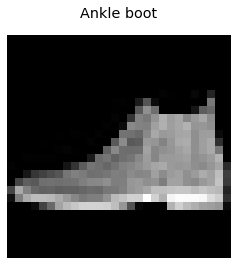

In [46]:
show_image(i, X_test, y_test)

In [47]:
class_names[pred[0]]

'Ankle boot'

In [48]:
def show_prediction(model, index, data, labels):
    """
    Use `model` to make a prediction on `data` at the given `index`
    
    Args:
        model (tf.keras.Model): Train keras model
        index (int): data index to predict
        data (pd.Dataframe): data source
        labels (pd.Series): data labels
    """
    global class_names
    
    pred = model.predict_classes(data[index:index+1])
    show_image(index, data, labels)
    predicted_label = class_names[pred[0]]
    actual_label = class_names[labels[index]]
    plt.title(f"Prediction: {predicted_label}, Actual: {actual_label}")

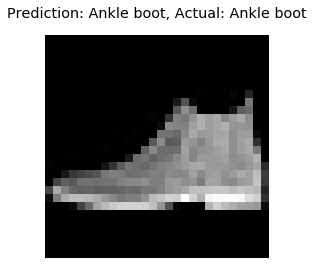

In [49]:
show_prediction(fashion_perceptron, 0, X_test, y_test)

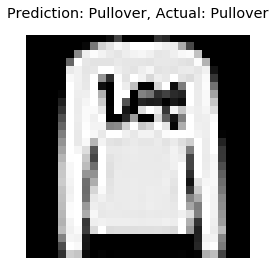

In [50]:
show_prediction(fashion_perceptron, 1, X_test, y_test)

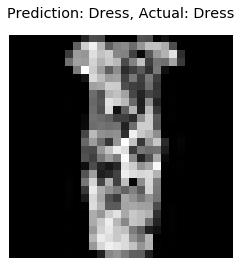

In [51]:
show_prediction(fashion_perceptron, 100, X_test, y_test)

---

# Even more examples

Saving the models and visualizing

In [52]:
fashion_perceptron.save('fashion.h5')

In [53]:
loaded_model = tf.keras.models.load_model("fashion.h5")

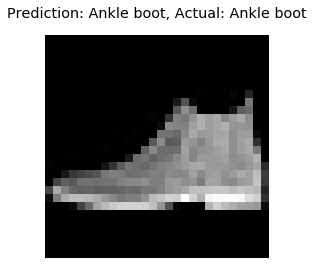

In [54]:
show_prediction(loaded_model, 0, X_test, y_test)

---

Callbacks

---

Fine Tuning

---

Exercises